In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Handling null values

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
null_per = df.isnull().mean() * 100
print(null_per)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [9]:
float_cols = df.select_dtypes(include=['float']).columns
for col in float_cols:
   median_value = df[col].median()  
   df[col].fillna(median_value, inplace=True)  


/var/folders/mh/vq9sbyf90916w8fzlwkc0g240000gn/T/ipykernel_6821/3718531169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/var/folders/mh/vq9sbyf90916w8fzlwkc0g240000gn/T/ipykernel_6821/3718531169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [11]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Visualization

In [21]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)


Column: Potability
[0 1]
----------------------------------------


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


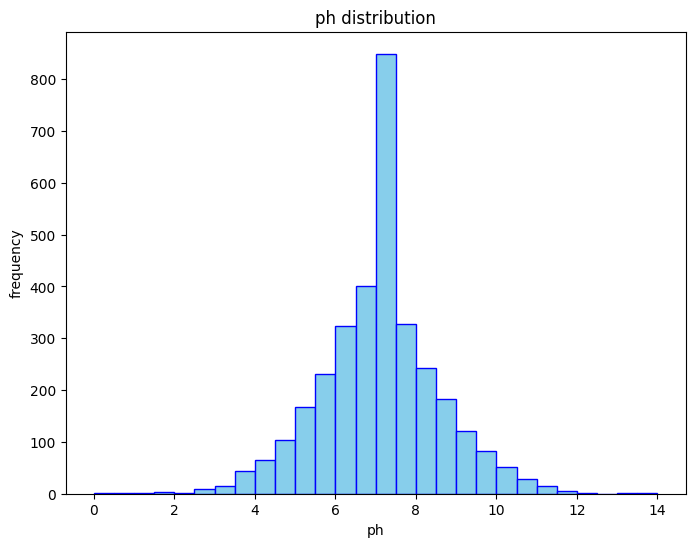

In [25]:
plt.figure(figsize = (8,6))
plt.hist(df['ph'], bins = 28, color = 'skyblue', edgecolor = 'blue') #bins -> interval gap
plt.title('ph distribution')
plt.xlabel('ph')
plt.ylabel('frequency')
plt.show()

In [29]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

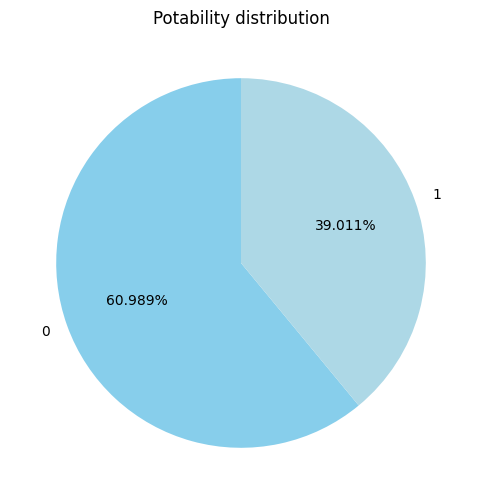

In [30]:
plt.figure(figsize = (8,6))
s_count = df["Potability"].value_counts()
name = ['0', '1']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','lightblue'])
plt.title("Potability distribution")
plt.show()

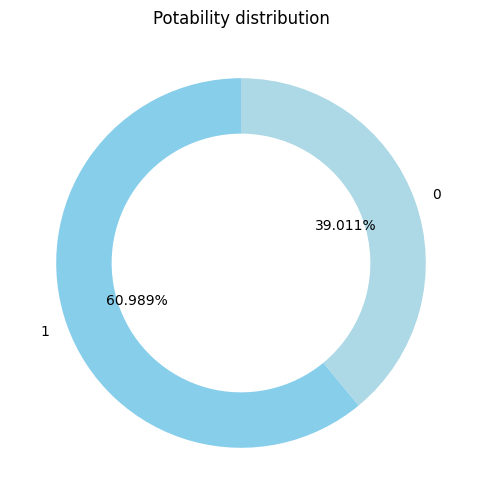

In [31]:
plt.figure(figsize = (8,6))
s_count = df["Potability"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','lightblue'], wedgeprops=dict(width=0.3))
plt.title("Potability distribution")
plt.show()

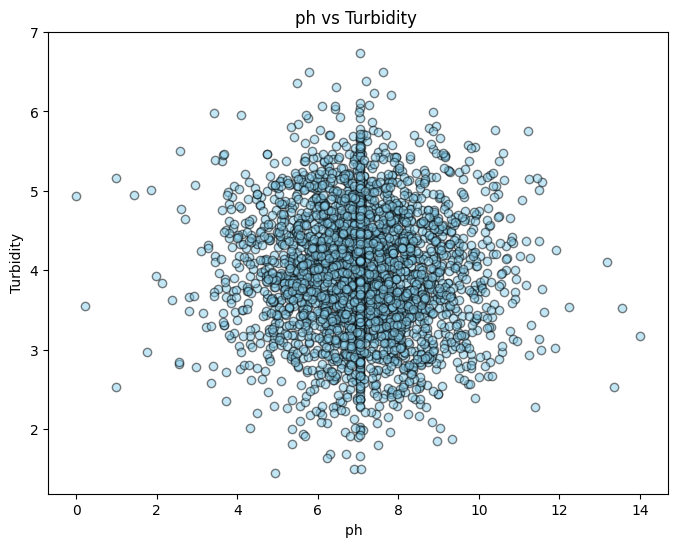

In [33]:
plt.figure(figsize = (8,6))
plt.scatter(df['ph'], df['Turbidity'], c = 'skyblue', edgecolor = 'k', alpha = 0.5)
plt.title('ph vs Turbidity ')
plt.xlabel('ph  ')
plt.ylabel('Turbidity')
plt.show()

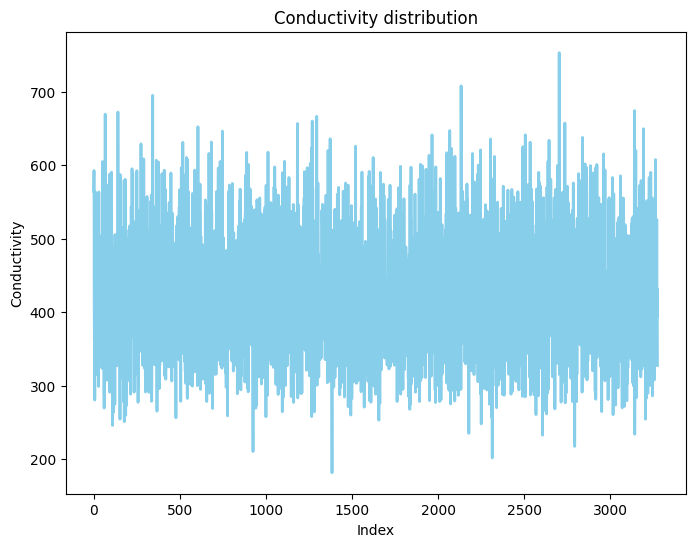

In [34]:
plt.figure(figsize = (8,6))
plt.plot(df.index, df['Conductivity'], c = 'skyblue', lw = 2)
plt.title('Conductivity distribution')
plt.xlabel('Index')
plt.ylabel('Conductivity')
plt.show()


<Figure size 800x600 with 0 Axes>

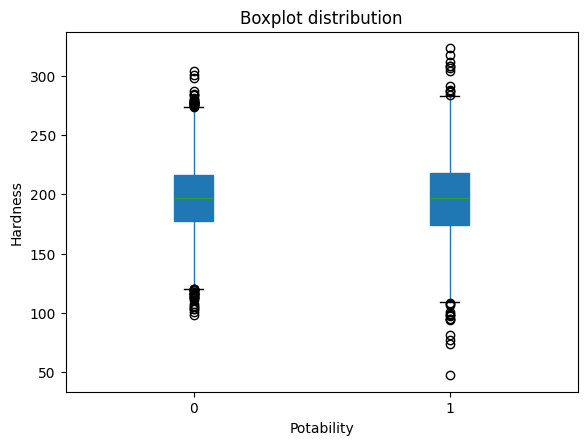

In [40]:
plt.figure(figsize = (8,6))
df.boxplot(column = 'Hardness', by = 'Potability', grid = False, patch_artist = True)
plt.suptitle('')
plt.title('Boxplot distribution')
plt.xlabel('Potability')
plt.ylabel('Hardness')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Model Training

In [90]:
X = df.drop('Potability', axis=1)  
y = df['Potability']  

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
scaler = StandardScaler()
# Fit and transform the training data( calulating both mean and variance)
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data( calc only variance)
X_test_scaled = scaler.transform(X_test)

In [102]:
knn = KNeighborsClassifier(n_neighbors=3)

In [103]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [104]:
y_pred = knn.predict(X_test_scaled)

In [105]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6326219512195121
Confusion Matrix:
[[310 102]
 [139 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.51      0.43      0.47       244

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.63       656

